                          Clustering o Análisis de grupos

<div class="img-container"> <!-- Block parent element -->
  <img src='images.png'>
</div>

Análisis de grupos o agrupamiento es la tarea de agrupar objetos por similitud, en grupos o conjuntos de manera que los miembros del mismo grupo tengan características similares. Es la tarea principal de la minería de datos exploratoria y es una técnica común en el análisis de datos estadísticos.


#### Ejercicio práctico

Utilizaremos las características de una base de datos de características de vinos para agruparlos debido a ellas.

In [47]:
# importamos la mayor parte de las libreria que utilizaremos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans

In [48]:
vinos = pd.read_csv('vinos.csv')
vinos.head(10)

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,7,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,8,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,9,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,10,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [49]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [50]:
# El ID del vino nno es necesario para nuestro modelo, por tal motivo podemos proceder a eliminarlo
# con el metodo drop()

vinos2 = vinos.drop(columns=['Vino'], axis=1)
vinos2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [51]:
# Podemos verificar los calores específicos con cada una de sus estadísticas,
# podemos notar que algunos valores en sus medidas o medias son muy altos en comparación de otros,
# por tal motivo sería aconsejable realizar una normalización de estos valores.
# Podemos realizar una conversion para que estos valores caigan en el mismo rango.
vinos2.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [52]:
# Normalización de valores
vinosNor= (vinos2-vinos2.min())/(vinos2.max()-vinos2.min())
vinosNor.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# No sabemos cuál es la cantidad de clusters necesarios, por tal motivo deberíamos verificar que
# cantidad sería la óptima para poder agruparlos. ""Codo de Jambu""

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, max_iter=300)
    kmeans.fit(vinosNor)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

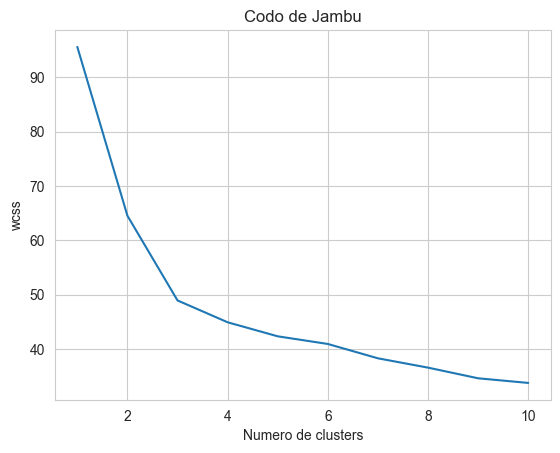

In [54]:
# Podemos realizar nuestra gráfica wscc para verificar cuál es el resultado de nuestro codo de Jambu y donde 
# empiece a disminuir la caída abrupta de la gráfica, podemos separar nuestros datos en números de cluster.
plt.plot(range(1,11),wcss)
plt.title('Codo de Jambu')
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [55]:
# Nuestra caída abrupta finaliza en el cluster número 3 o inclusive el 4.
# En este orden de ideas nuestro modelo tendrá 3 clusters
modelo = KMeans(n_clusters=3, max_iter=300)
modelo.fit(vinosNor)

KMeans(n_clusters=3)

In [56]:
# Ya que nuestro modelo se encuentra creado podemos agregar los clusters
# al objeto original.

vinos2["KMeansCluster"] = modelo.labels_
vinos2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeansCluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [57]:
# Realizaremos el análisis de componentes principales para o PCA por Principal Components Analysis
# Esto nos permite realizar una reducción de las variables a analizar.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcaVinos = pca.fit_transform(vinosNor)
pcaVinosDF = pd.DataFrame(data=pcaVinos, columns=["Componente_1","Componente_2"])
pcaNombresVinos = pd.concat([pcaVinosDF,vinos2[["KMeansCluster"]]],axis=1)

pcaNombresVinos

,Componente_1,Componente_2,KMeansCluster
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


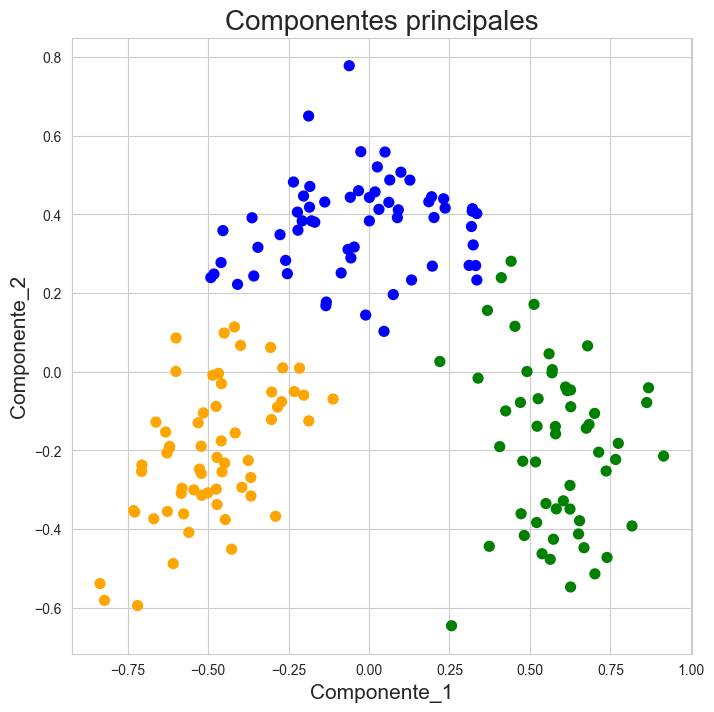

In [58]:
# Ya podemos graficar los dos componentes principales y los agrupamos por medio del color.
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente_1',fontsize=15)
ax.set_ylabel('Componente_2',fontsize=15)
ax.set_title('Componentes principales',fontsize=20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x= pcaNombresVinos.Componente_1, y= pcaNombresVinos.Componente_2, c=color_theme[pcaNombresVinos.KMeansCluster], s=50)